#### Author: Faolán Hamilton

Get the data from this link - https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

## Part 1 - 60%
Plot:

- The temperature
- The mean temperature each day
- The mean temperature for each month


## Part 2 - 40%

Plot:

- The Windspeed (there is data missing from this column)
- The rolling windspeed (say over 24 hours)
- The max windspeed for each day
- The monthly mean of the daily max windspeeds (yer I am being nasty here)

You do not need to over comment your code. Marks will be given for how nice the plots are.

In [1]:
from datetime import datetime as dt

from datetime import date as date

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

# format the datetime of plots
import matplotlib.dates as mdates

import seaborn as sns

## Step 1 - Cleaning the data

##### To get the csv to open, I thought I had to download the data from the link, bring it into the assignment folder and delete the first several rows to clean the data - all I had to do was use the 'skiprows' function!

In [2]:
# read in data
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)
df.head(2)

C:\Users\ClaireReilly\AppData\Local\Temp\ipykernel_34076\4014489085.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5


#### Looking at the question, I will only need temperature and windspeed so it is a good idea to remove unneccessary columns

In [3]:
# see all column names
headers = df.columns.tolist()
headers

['date',
 'ind',
 'rain',
 'ind.1',
 'temp',
 'ind.2',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'ind.3',
 'wdsp',
 'ind.4',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt']

In [4]:
# remove the headers that are not relevant
drop_col_list = ['ind','rain','ind.1', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3','ind.4', 'wddir', 'ww', 'w','sun','vis','clht','clamt']
df.drop(columns=drop_col_list, inplace=True)
df.head(2)

,date,temp,wdsp
0,10-apr-1996 14:00,11.5,0
1,31-jul-1996 08:00,11.5,0


In [5]:
# I want to see the dtype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257154 entries, 0 to 257153
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    257154 non-null  object 
 1   temp    257154 non-null  float64
 2   wdsp    257154 non-null  object 
dtypes: float64(1), object(2)
memory usage: 5.9+ MB


### I want to clean up the dtype, starting with the date column

##### Datetime conversion source: https://www.geeksforgeeks.org/pandas/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

In [6]:
# convert the date column to a datetime format
df['date'] = pd.to_datetime(df['date'], format="%d-%b-%Y %H:%M")
df['date']

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
257149   2025-11-30 20:00:00
257150   2025-11-30 21:00:00
257151   2025-11-30 22:00:00
257152   2025-11-30 23:00:00
257153   2025-12-01 00:00:00
Name: date, Length: 257154, dtype: datetime64[ns]

In [7]:
# set the date column as the index to search by dates easily
df.set_index('date', inplace=True)
df.head(2)

,temp,wdsp
date,,
1996-04-10 14:00:00,11.5,0
1996-07-31 08:00:00,11.5,0


In [8]:
# set the Wind speed column to numeric value
df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df.head(2)

,temp,wdsp
date,,
1996-04-10 14:00:00,11.5,0.0
1996-07-31 08:00:00,11.5,0.0


### The heading names are not entirely clear, I want to rename them

###### renaming columns (https://www.geeksforgeeks.org/python/how-to-rename-multiple-column-headers-in-a-pandas-dataframe/)

###### renaming index (https://stackoverflow.com/questions/19851005/rename-pandas-dataframe-index)

In [9]:
#improve the naming convention of the headings

df.columns = df.columns.str.replace('temp', 'Temperature (C)').str.replace('wdsp', 'Wind Speed (km)')
df.index.names = ['Date and Time']
df.head(2)

,Temperature (C),Wind Speed (km)
Date and Time,,
1996-04-10 14:00:00,11.5,0.0
1996-07-31 08:00:00,11.5,0.0


##### I want to check if there are any null values

In [10]:
# check for nulls
df.isnull().sum()

Temperature (C)     0
Wind Speed (km)    50
dtype: int64

##### check which rows nulls are in source (https://stackoverflow.com/questions/27159189/find-empty-or-nan-entry-in-pandas-dataframe)

In [11]:
# See which rows have empty values to double check later
df[(df['Wind Speed (km)'].isnull())].index

DatetimeIndex(['1996-08-01 22:00:00', '1996-09-27 13:00:00',
               '1996-10-14 02:00:00', '1996-10-14 03:00:00',
               '1996-10-14 04:00:00', '1996-10-14 05:00:00',
               '1996-10-14 06:00:00', '1996-10-14 07:00:00',
               '1996-10-14 08:00:00', '1996-10-14 09:00:00',
               '1996-10-15 01:00:00', '1996-10-15 02:00:00',
               '1996-10-15 03:00:00', '1996-10-15 04:00:00',
               '1996-10-15 05:00:00', '1996-10-15 06:00:00',
               '1996-10-15 07:00:00', '1996-10-15 08:00:00',
               '1996-10-15 17:00:00', '1996-10-15 18:00:00',
               '1996-10-15 19:00:00', '1996-10-15 20:00:00',
               '1996-10-15 21:00:00', '1996-10-15 22:00:00',
               '1996-10-15 23:00:00', '1996-10-16 00:00:00',
               '1996-10-16 01:00:00', '1996-10-16 02:00:00',
               '1996-10-16 03:00:00', '1996-10-16 04:00:00',
               '1996-10-16 05:00:00', '1996-10-16 06:00:00',
               '1996-10-

In [12]:
# check what the NaN value looks like
df.loc['1996-08-01 22:00:00']

Temperature (C)    10.8
Wind Speed (km)     NaN
Name: 1996-08-01 22:00:00, dtype: float64

#### There are 50 null values in Wind Speed, I will need to clean this data up - my chosen method will be to replace the null values with 0 to be consistent with the existing data structure

In [13]:
# fill NaN value with '0.0'
df.fillna(value='0.0', inplace=True)
df.head(2)

C:\Users\ClaireReilly\AppData\Local\Temp\ipykernel_34076\86212292.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(value='0.0', inplace=True)


,Temperature (C),Wind Speed (km)
Date and Time,,
1996-04-10 14:00:00,11.5,0.0
1996-07-31 08:00:00,11.5,0.0


In [14]:
# check to see if that worked
df.loc['1996-08-01 22:00:00']

Temperature (C)    10.8
Wind Speed (km)     0.0
Name: 1996-08-01 22:00:00, dtype: object

In [15]:
# checking again for nulls
df.isnull().sum()

Temperature (C)    0
Wind Speed (km)    0
dtype: int64

------------------------------------------------------------------------

## Step 2 - Part 1 of the assignment

#### Pandas resampling documentation 
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components#

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

https://www.geeksforgeeks.org/data-visualization/customizing-axis-labels-in-pandas-plots/

#### Colours
https://www.codespeedy.com/how-to-use-gradient-color-in-matplotlib-in-python/
https://matplotlib.org/stable/gallery/color/colormap_reference.html
https://duckduckgo.com/?q=format+a+plot+where+values+below+a+certain+number+on+the+y+axis+have+a+idfferent+colour&atb=v491-1&kbg=-1&ia=web
https://colorbrewer2.org/#type=diverging&scheme=RdBu&n=11

In [16]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

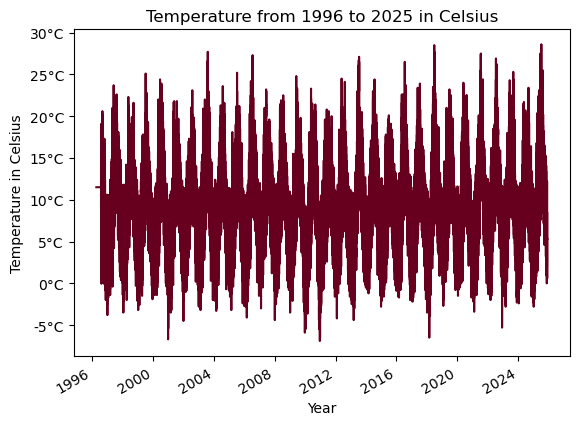

In [17]:
# plotting the Temperature


# (https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html)

value = df['Temperature (C)']


ax = df['Temperature (C)'].plot(cmap = 'RdBu')

plt.yticks ([-5,0,5,10,15,20,25,30], ['-5°C','0°C', '5°C', '10°C','15°C','20°C','25°C','30°C'])
ax.set_xlabel('Year')
ax.set_ylabel('Temperature in Celsius')
ax.set_title("Temperature from 1996 to 2025 in Celsius")


plt.show()

In [18]:
# Setting the mean temperature of each day 
meandaytemp = df['Temperature (C)'].resample("D").mean()
meandaytemp

Date and Time
1996-04-10    11.500000
1996-04-11          NaN
1996-04-12          NaN
1996-04-13          NaN
1996-04-14          NaN
                ...    
2025-11-27    10.633333
2025-11-28     6.666667
2025-11-29     4.200000
2025-11-30     3.858333
2025-12-01     8.400000
Freq: D, Name: Temperature (C), Length: 10828, dtype: float64

#### The data starts on the 1996-04-10, but doesn't become consistent until 1996-07-31. I will drop the na values between this time

In [19]:
meandaytemp.dropna(inplace=True)
meandaytemp

Date and Time
1996-04-10    11.500000
1996-07-31    12.650000
1996-08-01    11.666667
1996-08-02    12.504167
1996-08-03    14.266667
                ...    
2025-11-27    10.633333
2025-11-28     6.666667
2025-11-29     4.200000
2025-11-30     3.858333
2025-12-01     8.400000
Name: Temperature (C), Length: 10717, dtype: float64

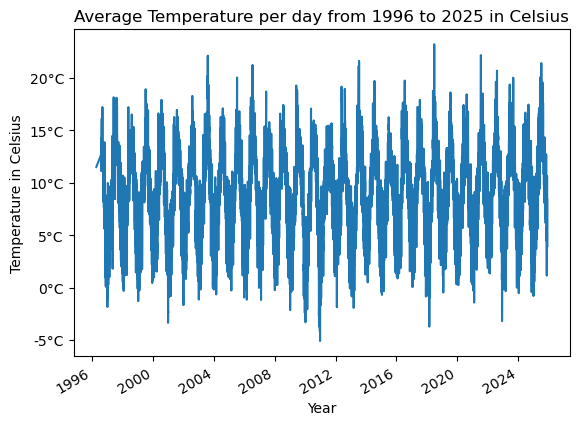

In [20]:
# plotting the mean day Temperature

ax = meandaytemp.plot()

plt.yticks ([-5,0,5,10,15,20], ['-5°C','0°C', '5°C', '10°C','15°C','20°C'])
ax.set_xlabel('Year')
ax.set_ylabel('Temperature in Celsius')
ax.set_title("Average Temperature per day from 1996 to 2025 in Celsius")
plt.show()

In [21]:
mean_month_temp = df['Temperature (C)'].resample("ME").mean()
mean_month_temp

Date and Time
1996-04-30    11.500000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31    12.650000
1996-08-31    12.946909
                ...    
2025-08-31    15.178495
2025-09-30    11.368056
2025-10-31     9.900134
2025-11-30     7.153889
2025-12-31     8.400000
Freq: ME, Name: Temperature (C), Length: 357, dtype: float64

In [22]:
mean_month_temp.dropna(inplace=True)
mean_month_temp

Date and Time
1996-04-30    11.500000
1996-07-31    12.650000
1996-08-31    12.946909
1996-09-30    12.174306
1996-10-31     9.614113
                ...    
2025-08-31    15.178495
2025-09-30    11.368056
2025-10-31     9.900134
2025-11-30     7.153889
2025-12-31     8.400000
Name: Temperature (C), Length: 355, dtype: float64

https://www.geeksforgeeks.org/python/matplotlib-setting-ticks-and-tick-labels/

https://stackoverflow.com/questions/22356881/using-a-pandas-dataframe-index-as-values-for-x-axis-in-matplotlib-plot

https://duckduckgo.com/?q=matplotlib+madates+formatter+plot+axis+based+on+index&atb=v491-1&kbg=-1&ia=web

<Axes: xlabel='Date and Time'>

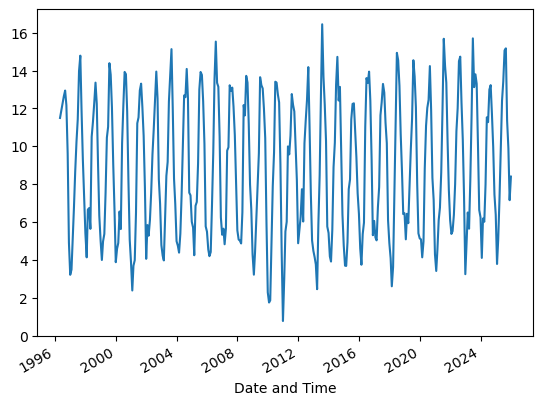

In [23]:
#.yticks([0,2,4,6,8,10,12,14,16],['0°C','2°C', '4°C', '6°C','8°C','10°C','12°C','14°C','16°C'])
mean_month_temp.plot(use_index=True)

In [24]:
# checking again for nulls
meandaytemp.isnull().sum()

0

#### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html

In [25]:
#df['temp'].interpolate()

### numpy documentation - mean (https://numpy.org/doc/stable/reference/generated/numpy.mean.html)

In [26]:
# mean temperature for all datetimes 
#tempmean = np.mean(df['temp'])
#tempmean